In [12]:
import os
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import json

from urbansounds import UrbanSoundDataset
from classify_audio import *

In [13]:
cwd = os.getcwd()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

IDEAL_INPUT_SIZE = (1, 64, 173)
cnn_relu = CNN_ReLU().to(device)
cnn_leaky = CNN_LeakyReLU().to(device)
cnn_tanh = CNN_Tanh().to(device)
cnn_sigmoid = CNN_Sigmoid().to(device)

summary(cnn_tanh, IDEAL_INPUT_SIZE)

Using device: cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 66, 175]             160
              Tanh-2          [-1, 16, 66, 175]               0
         MaxPool2d-3           [-1, 16, 33, 87]               0
            Conv2d-4           [-1, 32, 35, 89]           4,640
              Tanh-5           [-1, 32, 35, 89]               0
         MaxPool2d-6           [-1, 32, 17, 44]               0
            Conv2d-7           [-1, 64, 19, 46]          18,496
              Tanh-8           [-1, 64, 19, 46]               0
         MaxPool2d-9            [-1, 64, 9, 23]               0
           Conv2d-10          [-1, 128, 11, 25]          73,856
             Tanh-11          [-1, 128, 11, 25]               0
        MaxPool2d-12           [-1, 128, 5, 12]               0
          Flatten-13                 [-1, 7680]               0
           Linear-14 

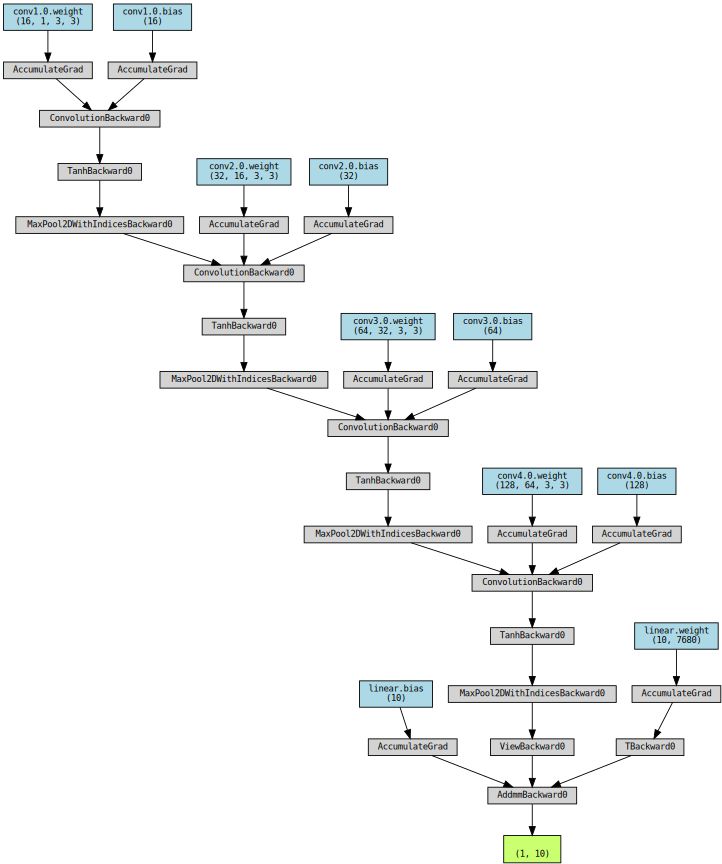

In [14]:
visualize_cnn(cnn_tanh, device, IDEAL_INPUT_SIZE)

In [15]:
SAMPLE_RATE = 22050
NUM_SAMPLES = SAMPLE_RATE*4
BATCH_SIZE = 64

mel_spectrogram = LogMelSpectrogram(
    sample_rate=SAMPLE_RATE, n_fft=1024, hop_length=512, n_mels=64
)

usd = UrbanSoundDataset(
    annotations_file=f"{cwd}/UrbanSound8K/metadata/UrbanSound8K.csv", 
    audio_dir=f"{cwd}/UrbanSound8K/audio", 
    transformation=mel_spectrogram, 
    target_sample_rate=SAMPLE_RATE, 
    num_samples=NUM_SAMPLES, 
    device=device
)

train_dataset, val_dataset, test_dataset = split_data(usd, train_split=0.7, val_split=0.15, test_split=0.15)
train_loader = create_data_loader(train_dataset, BATCH_SIZE) # size 6112
val_loader = create_data_loader(val_dataset, batch_size=256) # size 1309
test_loader = create_data_loader(test_dataset, batch_size=256) # size 1311

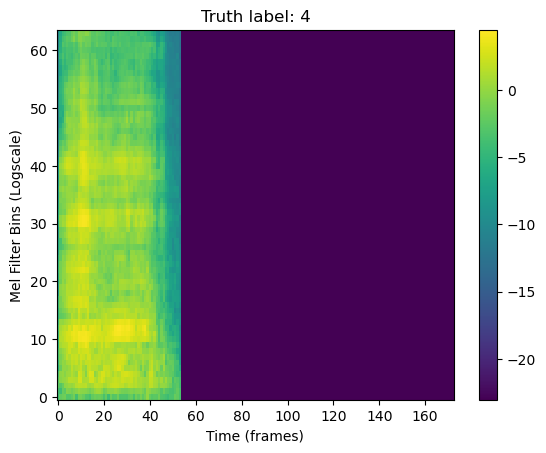

In [16]:
for i in range(1, 2):
    mel_spec, label = train_dataset[i]
    plot_mel_spectrogram(mel_spec, f"Truth label: {label}")

In [17]:
EPOCHS = 10
LEARNING_RATE = 0.001

# relu_results = train_cnn(cnn_relu, train_loader, val_loader, test_loader, EPOCHS, LEARNING_RATE)
# leaky_results = train_cnn(cnn_leaky, train_loader, val_loader, test_loader, EPOCHS, LEARNING_RATE)
# tanh_results = train_cnn(cnn_tanh, train_loader, val_loader, test_loader, EPOCHS, LEARNING_RATE)
# sigmoid_results = train_cnn(cnn_sigmoid, train_loader, val_loader, test_loader, EPOCHS, LEARNING_RATE)

# results = {
#     'relu': relu_results,
#     'leaky_relu': leaky_results,
#     'tanh': tanh_results,
#     'sigmoid': sigmoid_results
# }

result_path = os.path.join(cwd, 'results.json')
with open(result_path, 'r') as file:
    data = json.load(file)